# Experiment 7
Q. Implement feature scaling and one hot encoding data preprocessing techniques on the dataset imported in lab 4 or any other dataset.

Original DataFrame:
   Age  Salary  Country
0   25   50000      USA
1   30   60000   France
2   35   80000  Germany
3   40   90000      USA
4   45  120000   France

Processed DataFrame:
        Age    Salary  Country_France  Country_Germany  Country_USA
0 -1.414214 -1.224745             0.0              0.0          1.0
1 -0.707107 -0.816497             1.0              0.0          0.0
2  0.000000  0.000000             0.0              1.0          0.0
3  0.707107  0.408248             0.0              0.0          1.0
4  1.414214  1.632993             1.0              0.0          0.0


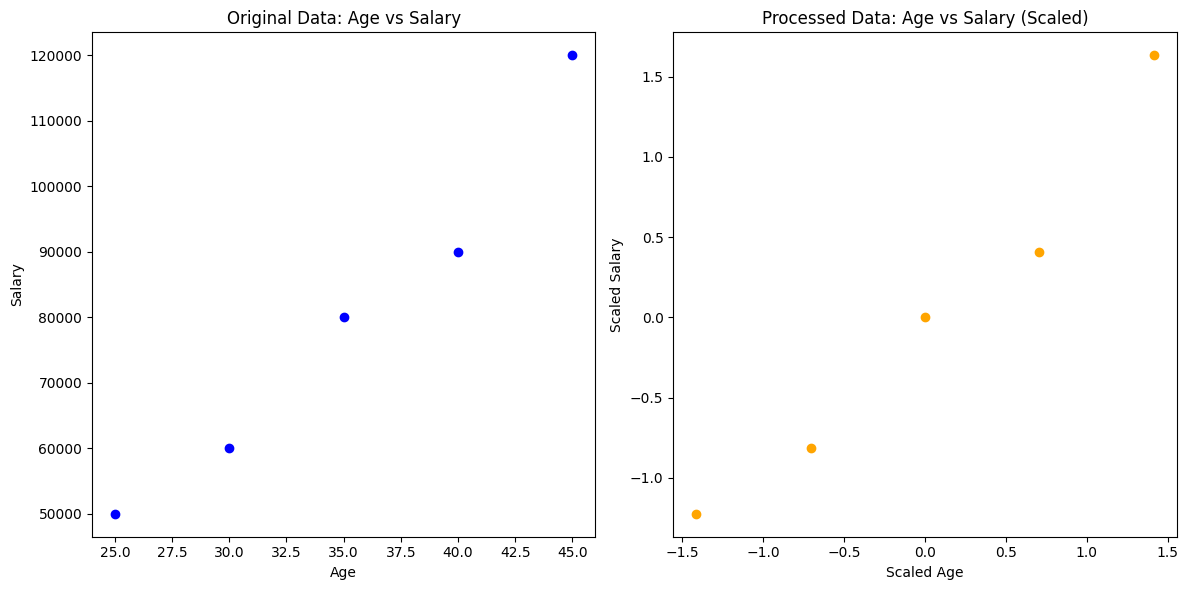

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Creating a sample dataset
data = {
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 80000, 90000, 120000],
    'Country': ['USA', 'France', 'Germany', 'USA', 'France']
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Define the features
X = df[['Age', 'Salary', 'Country']]

# Preprocessor: Scaling numerical features + Encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Salary']),
        ('cat', OneHotEncoder(), ['Country'])
    ]
)

# Create a pipeline that includes preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_processed = pipeline.fit_transform(X)

# Convert the result back to a DataFrame
column_names = (
    pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['Age', 'Salary']).tolist()
    + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(['Country']))
)

df_processed = pd.DataFrame(X_processed, columns=column_names)

print("\nProcessed DataFrame:")
print(df_processed)

# Plotting the results
plt.figure(figsize=(12, 6))

# Original Age vs Salary
plt.subplot(1, 2, 1)
plt.scatter(df['Age'], df['Salary'], color='blue')
plt.title("Original Data: Age vs Salary")
plt.xlabel('Age')
plt.ylabel('Salary')

# Processed Age vs Salary (scaled)
plt.subplot(1, 2, 2)
plt.scatter(df_processed['Age'], df_processed['Salary'], color='orange')
plt.title("Processed Data: Age vs Salary (Scaled)")
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Salary')

plt.tight_layout()
plt.show()
